In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [5]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
y_dev=data_dev[0]
x_dev=data_dev[1:n]
x_dev=x_dev/255

data_train=data[1000:m].T
y_train=data_train[0]
x_train=data_train[1:n]
x_train=x_train/255
_,m_train=x_train.shape

In [6]:
def init_params():
    w1=np.random.rand(10,784)-.5
    b1=np.random.rand(10,1)-.5
    w2=np.random.rand(15,10)-.5
    b2=np.random.rand(15,1)-.5
    w3=np.random.rand(10,15)-.5
    b3=np.random.rand(10,1)-.5
    return w1,b1,w2,b2,w3,b3

def ReLU(z):
    return np.maximum(z,0)

def softmax(z):
    return np.exp(z)/sum(np.exp(z))
    
def forward_prop(w1,b1,w2,b2,w3,b3,x):
    z1=w1.dot(x)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=ReLU(z2)
    z3=w3.dot(a2)+b3
    a3=softmax(z3)
    return z1,a1,z2,a2,z3,a3
    
def one_hot(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y

def deriv_ReLU(z):
    return z>0
    
def backward_prop(z1,a1,z2,a2,z3,a3,w1,w2,w3,x,y):
    m=y.size
    one_hot_y=one_hot(y)
    dz3=a3-one_hot_y
    dw3=1/m*dz3.dot(a2.T)
    db3=1/m*np.sum(dz3)
    dz2=w3.T.dot(dz3)*deriv_ReLU(z2) 
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*deriv_ReLU(z1) 
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2,dw3,db3

def update_params(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    w3=w3-alpha*dw3
    b3=b3-alpha*db3
    return w1,b1,w2,b2,w3,b3

In [7]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size

def gradient_descent(x,y,alpha,iterations):
    w1,b1,w2,b2,w3,b3=init_params()
    for i in range(iterations):
        z1,a1,z2,a2,z3,a3=forward_prop(w1,b1,w2,b2,w3,b3,x)
        dw1,db1,dw2,db2,dw3,db3=backward_prop(z1,a1,z2,a2,z3,a3,w1,w2,w3,x,y)
        w1,b1,w2,b2,w3,b3=update_params(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,alpha)
        if i%100==0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(a3),y))
    return w1,b1,w2,b2,w3,b3

In [8]:
w1,b1,w2,b2,w3,b3=gradient_descent(x_train, y_train,0.1,3000)

Iteration:  0
[1 9 9 ... 9 9 9] [8 1 0 ... 7 2 1]
Accuracy:  0.09851219512195122
Iteration:  10
[1 6 9 ... 9 3 9] [8 1 0 ... 7 2 1]
Accuracy:  0.16595121951219513
Iteration:  20
[1 1 2 ... 4 3 9] [8 1 0 ... 7 2 1]
Accuracy:  0.22885365853658537
Iteration:  30
[1 1 0 ... 4 3 5] [8 1 0 ... 7 2 1]
Accuracy:  0.27451219512195124
Iteration:  40
[1 1 0 ... 4 3 5] [8 1 0 ... 7 2 1]
Accuracy:  0.31426829268292683
Iteration:  50
[1 1 0 ... 4 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.3580243902439024
Iteration:  60
[1 1 0 ... 4 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.4055609756097561
Iteration:  70
[1 1 0 ... 4 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.4594146341463415
Iteration:  80
[1 1 0 ... 9 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.511
Iteration:  90
[1 1 0 ... 9 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.5504634146341464
Iteration:  100
[1 1 0 ... 7 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.5840731707317073
Iteration:  110
[1 1 0 ... 7 3 1] [8 1 0 ... 7 2 1]
Accuracy:  0.6114878048780488
Iteration:  120
[8 1 0 ... 7 3 1] [

In [9]:
def make_predictions(x,w1,b1,w2,b2,w3,b3):
    _,_,_,_,_,a3=forward_prop(w1,b1,w2,b2,w3,b3,x)
    predictions=get_predictions(a3)
    return predictions

def test_predictions(index,w1,b1,w2,b2,w3,b3):
    current_image=x_train[:,index,None]
    predictions=make_predictions(x_train[:,index,None],w1,b1,w2,b2,w3,b3)
    label=y_train[index]
    print("Prediction: ",predictions)
    print("Label: ",label)
    
    current_image=current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation="nearest")
    plt.show()

Prediction:  [7]
Label:  7


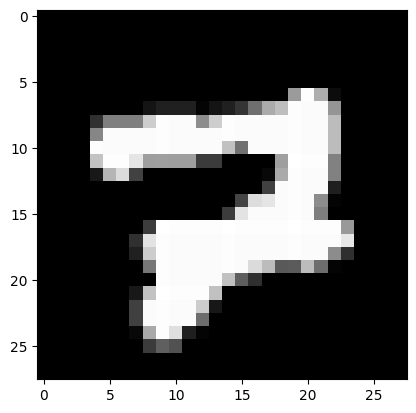

In [10]:
test_predictions(999,w1,b1,w2,b2,w3,b3)